In [81]:
# pip install -U scikit-learn
# pip install pandas numpy matplotlib seaborn statsmodels tensorflow bokeh

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # pip install statsmodels

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

import keras
from keras import regularizers
from keras import layers

from keras.models import Sequential

from keras.callbacks import EarlyStopping

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LayerNormalization, BatchNormalization

import os


***
# DO NOT REMOVE

In [82]:
# root_logdir = os.path.join(os.curdir, "my_logs")

# def get_run_logdir(config):
#     import time
#     run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
#     return os.path.join(root_logdir, f"{run_id}-{config['epochs']}-{config['batch_size']}-{config['lr']}-{config['patience']}")

***

In [83]:
df = pd.read_csv('./df_agg_57.csv')
print(df.shape)
df.head()

(57, 117)


,storm,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,Georges,16,1998-09-15,1998-10-01,63.60,0.0,1445.0,0.0,26.18,18.2,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,Isidore,5,2002-09-14,2002-09-27,26.16,0.0,431.0,0.0,25.72,12.3,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,Lili,2,2002-09-21,2002-10-04,3.77,0.0,77.0,0.0,26.40,21.6,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,Ivan,57,2004-09-02,2004-09-24,35.21,-2.0,891.0,0.0,25.90,12.1,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,Dorian,10,2019-08-24,2019-09-09,4.11,0.0,183.0,0.0,25.50,7.7,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [84]:
all_original_columns = list(df.columns)
all_original_columns

['storm',
 'deaths',
 'min_time',
 'max_time',
 'avg_elevation',
 'min_elevation',
 'max_elevation',
 'med_elevation',
 'avg_temperature_2m',
 'min_temperature_2m',
 'max_temperature_2m',
 'med_temperature_2m',
 'avg_relativehumidity_2m',
 'min_relativehumidity_2m',
 'max_relativehumidity_2m',
 'med_relativehumidity_2m',
 'avg_dewpoint_2m',
 'min_dewpoint_2m',
 'max_dewpoint_2m',
 'med_dewpoint_2m',
 'avg_apparent_temperature',
 'min_apparent_temperature',
 'max_apparent_temperature',
 'med_apparent_temperature',
 'avg_precipitation',
 'min_precipitation',
 'max_precipitation',
 'med_precipitation',
 'avg_rain',
 'min_rain',
 'max_rain',
 'med_rain',
 'avg_pressure_msl',
 'min_pressure_msl',
 'max_pressure_msl',
 'med_pressure_msl',
 'avg_surface_pressure',
 'min_surface_pressure',
 'max_surface_pressure',
 'med_surface_pressure',
 'avg_cloudcover',
 'min_cloudcover',
 'max_cloudcover',
 'med_cloudcover',
 'avg_cloudcover_low',
 'min_cloudcover_low',
 'max_cloudcover_low',
 'med_cloudc

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 117 entries, storm to target_cost
dtypes: float64(99), int64(15), object(3)
memory usage: 52.2+ KB


In [86]:
num_df = df.copy()

In [87]:
num_df.drop(columns=['storm'], axis=1, inplace=True)

In [88]:
num_df.head()

,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,16,1998-09-15,1998-10-01,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,5,2002-09-14,2002-09-27,26.16,0.0,431.0,0.0,25.72,12.3,29.7,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,2,2002-09-21,2002-10-04,3.77,0.0,77.0,0.0,26.40,21.6,31.8,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,57,2004-09-02,2004-09-24,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,10,2019-08-24,2019-09-09,4.11,0.0,183.0,0.0,25.50,7.7,30.3,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [89]:
# Convert the datetime column to a timestamp format (seconds since epoch)
num_df['min_time'] = pd.to_datetime(num_df['min_time'])
num_df['max_time'] = pd.to_datetime(num_df['max_time'])
num_df['min_time'] = num_df['min_time'].view('int64') // 10**9
num_df['max_time'] = num_df['max_time'].view('int64') // 10**9
num_df.head()

,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,16,905817600,907200000,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,5,1031961600,1033084800,26.16,0.0,431.0,0.0,25.72,12.3,29.7,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,2,1032566400,1033689600,3.77,0.0,77.0,0.0,26.40,21.6,31.8,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,57,1094083200,1095984000,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,10,1566604800,1567987200,4.11,0.0,183.0,0.0,25.50,7.7,30.3,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [90]:
constant_columns = num_df.columns[num_df.nunique() <= 1]
constant_columns


Index(['min_precipitation', 'min_rain', 'max_cloudcover', 'min_cloudcover_low',
       'max_cloudcover_low', 'max_cloudcover_mid', 'max_cloudcover_high',
       'min_et0_fao_evapotranspiration', 'min_soil_moisture_0_to_7cm',
       'min_soil_moisture_7_to_28cm', 'min_soil_moisture_28_to_100cm',
       'min_soil_moisture_100_to_255cm'],
      dtype='object')

In [91]:
list(num_df.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),


In [92]:
"""These columns don't provide any variability, and thus can't be correlated with other columns. 
When you try to compute the correlation of a constant column with any other column, the result is NaN (not a number) 
because the standard deviation of a constant column is zero, and you can't divide by zero in the correlation formula."""

constant_columns = num_df.columns[num_df.nunique() == 1]
constant_columns

Index(['min_precipitation', 'min_rain', 'max_cloudcover', 'min_cloudcover_low',
       'max_cloudcover_low', 'max_cloudcover_mid', 'max_cloudcover_high',
       'min_et0_fao_evapotranspiration', 'min_soil_moisture_0_to_7cm',
       'min_soil_moisture_7_to_28cm', 'min_soil_moisture_28_to_100cm',
       'min_soil_moisture_100_to_255cm'],
      dtype='object')

In [93]:
# Dropping constant columns
num_df = num_df.drop(columns=constant_columns)
print(num_df.shape)
num_df.head()

(57, 104)


,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,...,avg_soil_moisture_7_to_28cm,max_soil_moisture_7_to_28cm,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,16,905817600,907200000,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,...,0.15,0.52,0.0,0.13,0.52,0.0,0.11,0.50,0.0,11191.0
1,5,1031961600,1033084800,26.16,0.0,431.0,0.0,25.72,12.3,29.7,...,0.14,0.52,0.0,0.11,0.49,0.0,0.09,0.50,0.0,1943.5
2,2,1032566400,1033689600,3.77,0.0,77.0,0.0,26.40,21.6,31.8,...,0.07,0.52,0.0,0.06,0.51,0.0,0.05,0.44,0.0,1866.6
3,57,1094083200,1095984000,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,...,0.06,0.52,0.0,0.06,0.52,0.0,0.06,0.50,0.0,33005.8
4,10,1566604800,1567987200,4.11,0.0,183.0,0.0,25.50,7.7,30.3,...,0.04,0.44,0.0,0.03,0.43,0.0,0.02,0.38,0.0,1915.9


# Feature Correlations

In [94]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColorBar, LinearColorMapper, ColumnDataSource, HoverTool
from bokeh.transform import transform
from bokeh.layouts import column
from bokeh.models.tickers import BasicTicker

output_notebook()

correlation_data = num_df.corr()

correlation_matrix = pd.DataFrame({
    'x_name': correlation_data.columns.repeat(len(correlation_data.index)),
    'y_name': np.tile(correlation_data.index, len(correlation_data.columns)),
    'values': correlation_data.values.ravel()
})

# Filter correlation_matrix for abs(values) >= 0.8
correlation_matrix = correlation_matrix[correlation_matrix['values'].abs() >= 0.8]

source = ColumnDataSource(correlation_matrix)

colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "darkred"]
mapper = LinearColorMapper(palette=colors, low=-1, high=1)  # As correlations range between -1 and 1

unique_factors = list(correlation_data.columns)
p = figure(title="Heatmap",
           x_range=unique_factors, y_range=unique_factors, tools="", width=1500, height=1500)

p.xaxis.major_label_orientation = "vertical"

p.rect(x="x_name", y="y_name", width=1, height=1, source=source,
       line_color='white', fill_color=transform('values', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)))

p.add_layout(color_bar, 'right')

# Adding hover tool for interactivity
hover = HoverTool()
hover.tooltips = [("X", "@x_name"), ("Y", "@y_name"), ("Correlation", "@values")]
p.add_tools(hover)

show(p)


Loading BokehJS ...

In [95]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# import pandas as pd

# # Assume df is your DataFrame
# X = num_df.iloc[:, :-1]  # Predictor columns
# y = num_df['target_cost']  # Target column

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Fit model
# model = LinearRegression()
# model.fit(X_scaled, y)

# # Get feature importances (coefficients in this case)
# feature_importance = model.coef_

# # Pair feature names with importance
# features_list = list(X.columns)
# feature_importance_list = list(zip(features_list, feature_importance))

# # Sort by absolute value of coefficient
# sorted_features = sorted(feature_importance_list, key=lambda x: abs(x[1]), reverse=True)

# # Select top 50 features
# top_50_features = [feature for feature, _ in sorted_features[:50]]

# print("Top 50 most influential features:", top_50_features)



In [96]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats
# # Assume X and y are your predictors and target variable
# X = num_df.iloc[:, :-1]  # Predictor columns
# y = num_df['target_cost']  # Target column

# # Fit OLS model
# X_with_const = sm.add_constant(X_scaled)  # Adds constant term to predictors
# ols_model = sm.OLS(y, X_with_const).fit()

# # Residuals
# residuals = ols_model.resid

# # Fitted values
# fitted = ols_model.fittedvalues

# # Residual vs Fitted plot for Linearity and Homoscedasticity
# plt.scatter(fitted, residuals)
# plt.axhline(0, color='r', linestyle='--')
# plt.xlabel('Fitted values')
# plt.ylabel('Residuals')
# plt.show()

# # QQ plot for Normality
# sm.qqplot(residuals, line='s')
# plt.show()

# # VIF for Multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
# print(vif_data)


In [97]:
# top_50_features

In [98]:
# len(top_predictors)

In [99]:
correlation_matrix[correlation_matrix['values'].abs() >= 0.8]

,x_name,y_name,values
0,deaths,deaths,1.000000
105,min_time,min_time,1.000000
106,min_time,max_time,1.000000
209,max_time,min_time,1.000000
210,max_time,max_time,1.000000
...,...,...,...
10704,med_soil_moisture_100_to_255cm,med_soil_moisture_7_to_28cm,0.964593
10707,med_soil_moisture_100_to_255cm,med_soil_moisture_28_to_100cm,0.979436
10708,med_soil_moisture_100_to_255cm,avg_soil_moisture_100_to_255cm,0.834654
10710,med_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,1.000000


In [100]:
correlation_matrix

,x_name,y_name,values
0,deaths,deaths,1.000000
105,min_time,min_time,1.000000
106,min_time,max_time,1.000000
209,max_time,min_time,1.000000
210,max_time,max_time,1.000000
...,...,...,...
10704,med_soil_moisture_100_to_255cm,med_soil_moisture_7_to_28cm,0.964593
10707,med_soil_moisture_100_to_255cm,med_soil_moisture_28_to_100cm,0.979436
10708,med_soil_moisture_100_to_255cm,avg_soil_moisture_100_to_255cm,0.834654
10710,med_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,1.000000


In [101]:
prep_corr = correlation_matrix.copy()
prep_corr

,x_name,y_name,values
0,deaths,deaths,1.000000
105,min_time,min_time,1.000000
106,min_time,max_time,1.000000
209,max_time,min_time,1.000000
210,max_time,max_time,1.000000
...,...,...,...
10704,med_soil_moisture_100_to_255cm,med_soil_moisture_7_to_28cm,0.964593
10707,med_soil_moisture_100_to_255cm,med_soil_moisture_28_to_100cm,0.979436
10708,med_soil_moisture_100_to_255cm,avg_soil_moisture_100_to_255cm,0.834654
10710,med_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,1.000000


In [102]:
corrs_to_review = prep_corr[prep_corr['x_name'] != prep_corr['y_name']]
# corrs_to_review.to_csv('./corrs_to_review.csv', index=False)

In [103]:
reduced_df = num_df.copy()
# reduced_df.drop(columns=['avg_rain', 
#                         'med_rain', 
#                         'avg_dewpoint_2m', 
#                         'med_dewpoint_2m', 
#                         'min_dewpoint_2m', 
#                         'min_temperature_2m', 
#                         'med_temperature_2m',
#                         'avg_temperature_2m',
#                         'max_time',
#                         'avg_soil_moisture_0_to_7cm',
#                         'avg_soil_moisture_100_to_255cm',
#                         'med_vapor_pressure_deficit',
#                         'avg_soil_temperature_0_to_7cm',
#                         'avg_windspeed_10m',
#                         'max_soil_temperature_7_to_28cm',
#                         'min_soil_temperature_7_to_28cm',
#                         'avg_soil_temperature_7_to_28cm',
#                         'med_soil_temperature_7_to_28cm'
#                         ], 
#                         axis=1, inplace=True)

# reduced_df.drop(columns=[
#     'avg_rain',
#     'max_rain',
#     'med_rain',
#     'deaths',
    
#     ], 
#     axis=1, inplace=True)
reduced_df.shape

(57, 104)

In [104]:
# Find columns with only one unique value
single_value_columns = reduced_df.columns[reduced_df.nunique() == 1].tolist()
single_value_columns

[]

In [105]:
# Compute correlation matrix
correlation_matrix = reduced_df.corr()

# Find columns with absolute correlation > 0.8
columns_to_drop = set()
dropped = set()

for col in correlation_matrix.columns:
    if col not in dropped:
        # Exclude self-correlation
        correlated_cols = correlation_matrix.index[(correlation_matrix[col].abs() > 0.8) & (correlation_matrix.index != col)]
        for correlated_col in correlated_cols:
            columns_to_drop.add(correlated_col)
            dropped.add(correlated_col)

# Drop those columns
reduced_df.drop(columns=columns_to_drop, inplace=True)
reduced_df.drop(columns=['deaths'], inplace=True)

reduced_df.shape



(57, 45)

In [106]:
output_notebook()

correlation_data = reduced_df.corr()

correlation_matrix = pd.DataFrame({
    'x_name': correlation_data.columns.repeat(len(correlation_data.index)),
    'y_name': np.tile(correlation_data.index, len(correlation_data.columns)),
    'values': correlation_data.values.ravel()
})

# Filter correlation_matrix for abs(values) >= 0.8
# correlation_matrix = correlation_matrix[correlation_matrix['values'].abs() >= 0.8]

source = ColumnDataSource(correlation_matrix)

colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "darkred"]
mapper = LinearColorMapper(palette=colors, low=-1, high=1)  # As correlations range between -1 and 1

unique_factors = list(correlation_data.columns)
p = figure(title="Heatmap",
           x_range=unique_factors, y_range=unique_factors, tools="", width=1500, height=1500)

p.xaxis.major_label_orientation = "vertical"

p.rect(x="x_name", y="y_name", width=1, height=1, source=source,
       line_color='white', fill_color=transform('values', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)))

p.add_layout(color_bar, 'right')

# Adding hover tool for interactivity
hover = HoverTool()
hover.tooltips = [("X", "@x_name"), ("Y", "@y_name"), ("Correlation", "@values")]
p.add_tools(hover)

show(p)

Loading BokehJS ...

In [107]:
reduced_df.shape

(57, 45)

In [108]:
reduced_columns = list(reduced_df.columns)
print(len(reduced_columns))
reduced_columns

45


['min_time',
 'avg_elevation',
 'min_elevation',
 'max_elevation',
 'med_elevation',
 'avg_temperature_2m',
 'min_temperature_2m',
 'max_temperature_2m',
 'med_temperature_2m',
 'avg_relativehumidity_2m',
 'min_relativehumidity_2m',
 'max_relativehumidity_2m',
 'max_dewpoint_2m',
 'avg_apparent_temperature',
 'avg_precipitation',
 'max_precipitation',
 'avg_pressure_msl',
 'min_pressure_msl',
 'max_pressure_msl',
 'avg_surface_pressure',
 'avg_cloudcover',
 'min_cloudcover',
 'avg_cloudcover_low',
 'min_cloudcover_mid',
 'avg_cloudcover_high',
 'med_cloudcover_high',
 'avg_et0_fao_evapotranspiration',
 'max_et0_fao_evapotranspiration',
 'med_et0_fao_evapotranspiration',
 'avg_windspeed_10m',
 'min_windspeed_10m',
 'avg_winddirection_10m',
 'max_winddirection_10m',
 'max_winddirection_100m',
 'min_windgusts_10m',
 'max_soil_temperature_0_to_7cm',
 'max_soil_temperature_7_to_28cm',
 'avg_soil_temperature_100_to_255cm',
 'min_soil_temperature_100_to_255cm',
 'max_soil_temperature_100_to_2

In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd


X_optim = reduced_df.drop('target_cost', axis=1)
y_optim = reduced_df['target_cost']

X_train, X_test, y_train, y_test = train_test_split(X_optim, y_optim, test_size=0.2, random_state=42)

# linear regression model for use in feature selection
model_lr = LinearRegression()

# RFE model to select the best n features
rfe = RFE(model_lr, n_features_to_select=20)  # <<-- adjust the number of top features to select
rfe = rfe.fit(X_train, y_train)

# Summarize the selection of the attributes
feature_ranking = list(zip(X_optim.columns, rfe.ranking_, rfe.support_))
# Creating a DataFrame for better visibility
ranking_df = pd.DataFrame(feature_ranking, columns=['Feature', 'Ranking', 'Selected'])

# Get features that RFE identified as most important
selected_features = X_optim.columns[rfe.support_]

# Fit the model selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()

# Summary of the final model
summary = model_selected.summary()

print(summary)
print(ranking_df.sort_values('Ranking'))


                            OLS Regression Results                            
Dep. Variable:            target_cost   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                 -0.195
Method:                 Least Squares   F-statistic:                    0.6413
Date:                Tue, 07 Nov 2023   Prob (F-statistic):              0.842
Time:                        16:23:47   Log-Likelihood:                -529.65
No. Observations:                  45   AIC:                             1101.
Df Residuals:                      24   BIC:                             1139.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

# Random Forest GridSearchCV

The code below is used for feature selection and model training in a machine learning.

1. Libraries like `sklearn`, `RandomForestRegressor`, `GridSearchCV`, `train_test_split`, `StandardScaler`, and `statsmodels.api` are imported.
2. The dataset is prepared by dropping some columns and scaling the features using `StandardScaler`.
3. A training and test set split is performed with a test size of 20%.
4. A parameter grid for a `RandomForestRegressor` is defined with various hyperparameters to be searched using `GridSearchCV`.
5. Grid search is conducted to find the best hyperparameters using 3-fold cross-validation, and the best parameters found are printed out.
6. Recursive Feature Elimination (RFE) is used with the best estimator from the grid search to select the most important features.
7. An Ordinary Least Squares (OLS) regression model from the `statsmodels` library is trained on the selected features, and a summary of the model is printed out which includes R-squared, F-statistic, and other metrics.
8. Finally, the script prints out the ranking of the features based on their importance as determined by RFE.

The output shown indicates that the grid search evaluated 672 candidate models over 3 folds, leading to a total of 2016 fits. The best parameters included 'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 20. It also mentions that RFE selected 44 features and provides an OLS regression result summary with an R-squared value of 0.997, indicating a model that explains a high proportion of variance in the dependent variable.

In [110]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

X_optim = reduced_df.drop(columns=['target_cost'], axis=1)
y_optim = reduced_df['target_cost']

scaler = StandardScaler()
X_optim_scaled = scaler.fit_transform(X_optim)  # Scale the data
X_optim_scaled_df = pd.DataFrame(X_optim_scaled, columns=X_optim.columns)  # Convert back to DataFrame
# print(X_optim_scaled_df)

X_train, X_test, y_train, y_test = train_test_split(X_optim_scaled_df, y_optim, test_size=0.2, random_state=32)

param_grid = {
    'n_estimators': [100, 200, 50, 25, 20, 15, 10],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 6],
    'bootstrap': [True, False],
}
# linear regression model for use in feature selection
model_rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 672 candidates, totalling 2016 fits


Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 10}


In [111]:
model_rf = grid_search.best_estimator_

n_top_features = len(X_optim.columns) # <<-- adjust the number of top features to select
print(f"Selecting {n_top_features} features")

# RFE model to select the best n features
rfe = RFE(model_rf, n_features_to_select=n_top_features)  
rfe = rfe.fit(X_train, y_train)

# Summariz the selection of the attributes
feature_ranking = list(zip(X_optim.columns, rfe.ranking_, rfe.support_))

# Creating a DataFrame for better visibility
ranking_df = pd.DataFrame(feature_ranking, columns=['Feature', 'Ranking', 'Selected'])

# Get features that RFE identified as most important
selected_features = X_optim.columns[rfe.support_]
# print(selected_features)

# Fit the model selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()

# Summary of the final model
summary = model_selected.summary()

print(summary)
print(ranking_df.sort_values('Ranking'))

Selecting 44 features
                            OLS Regression Results                            
Dep. Variable:            target_cost   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     9.173
Date:                Tue, 07 Nov 2023   Prob (F-statistic):              0.257
Time:                        16:23:54   Log-Likelihood:                -396.66
No. Observations:                  45   AIC:                             881.3
Df Residuals:                       1   BIC:                             960.8
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

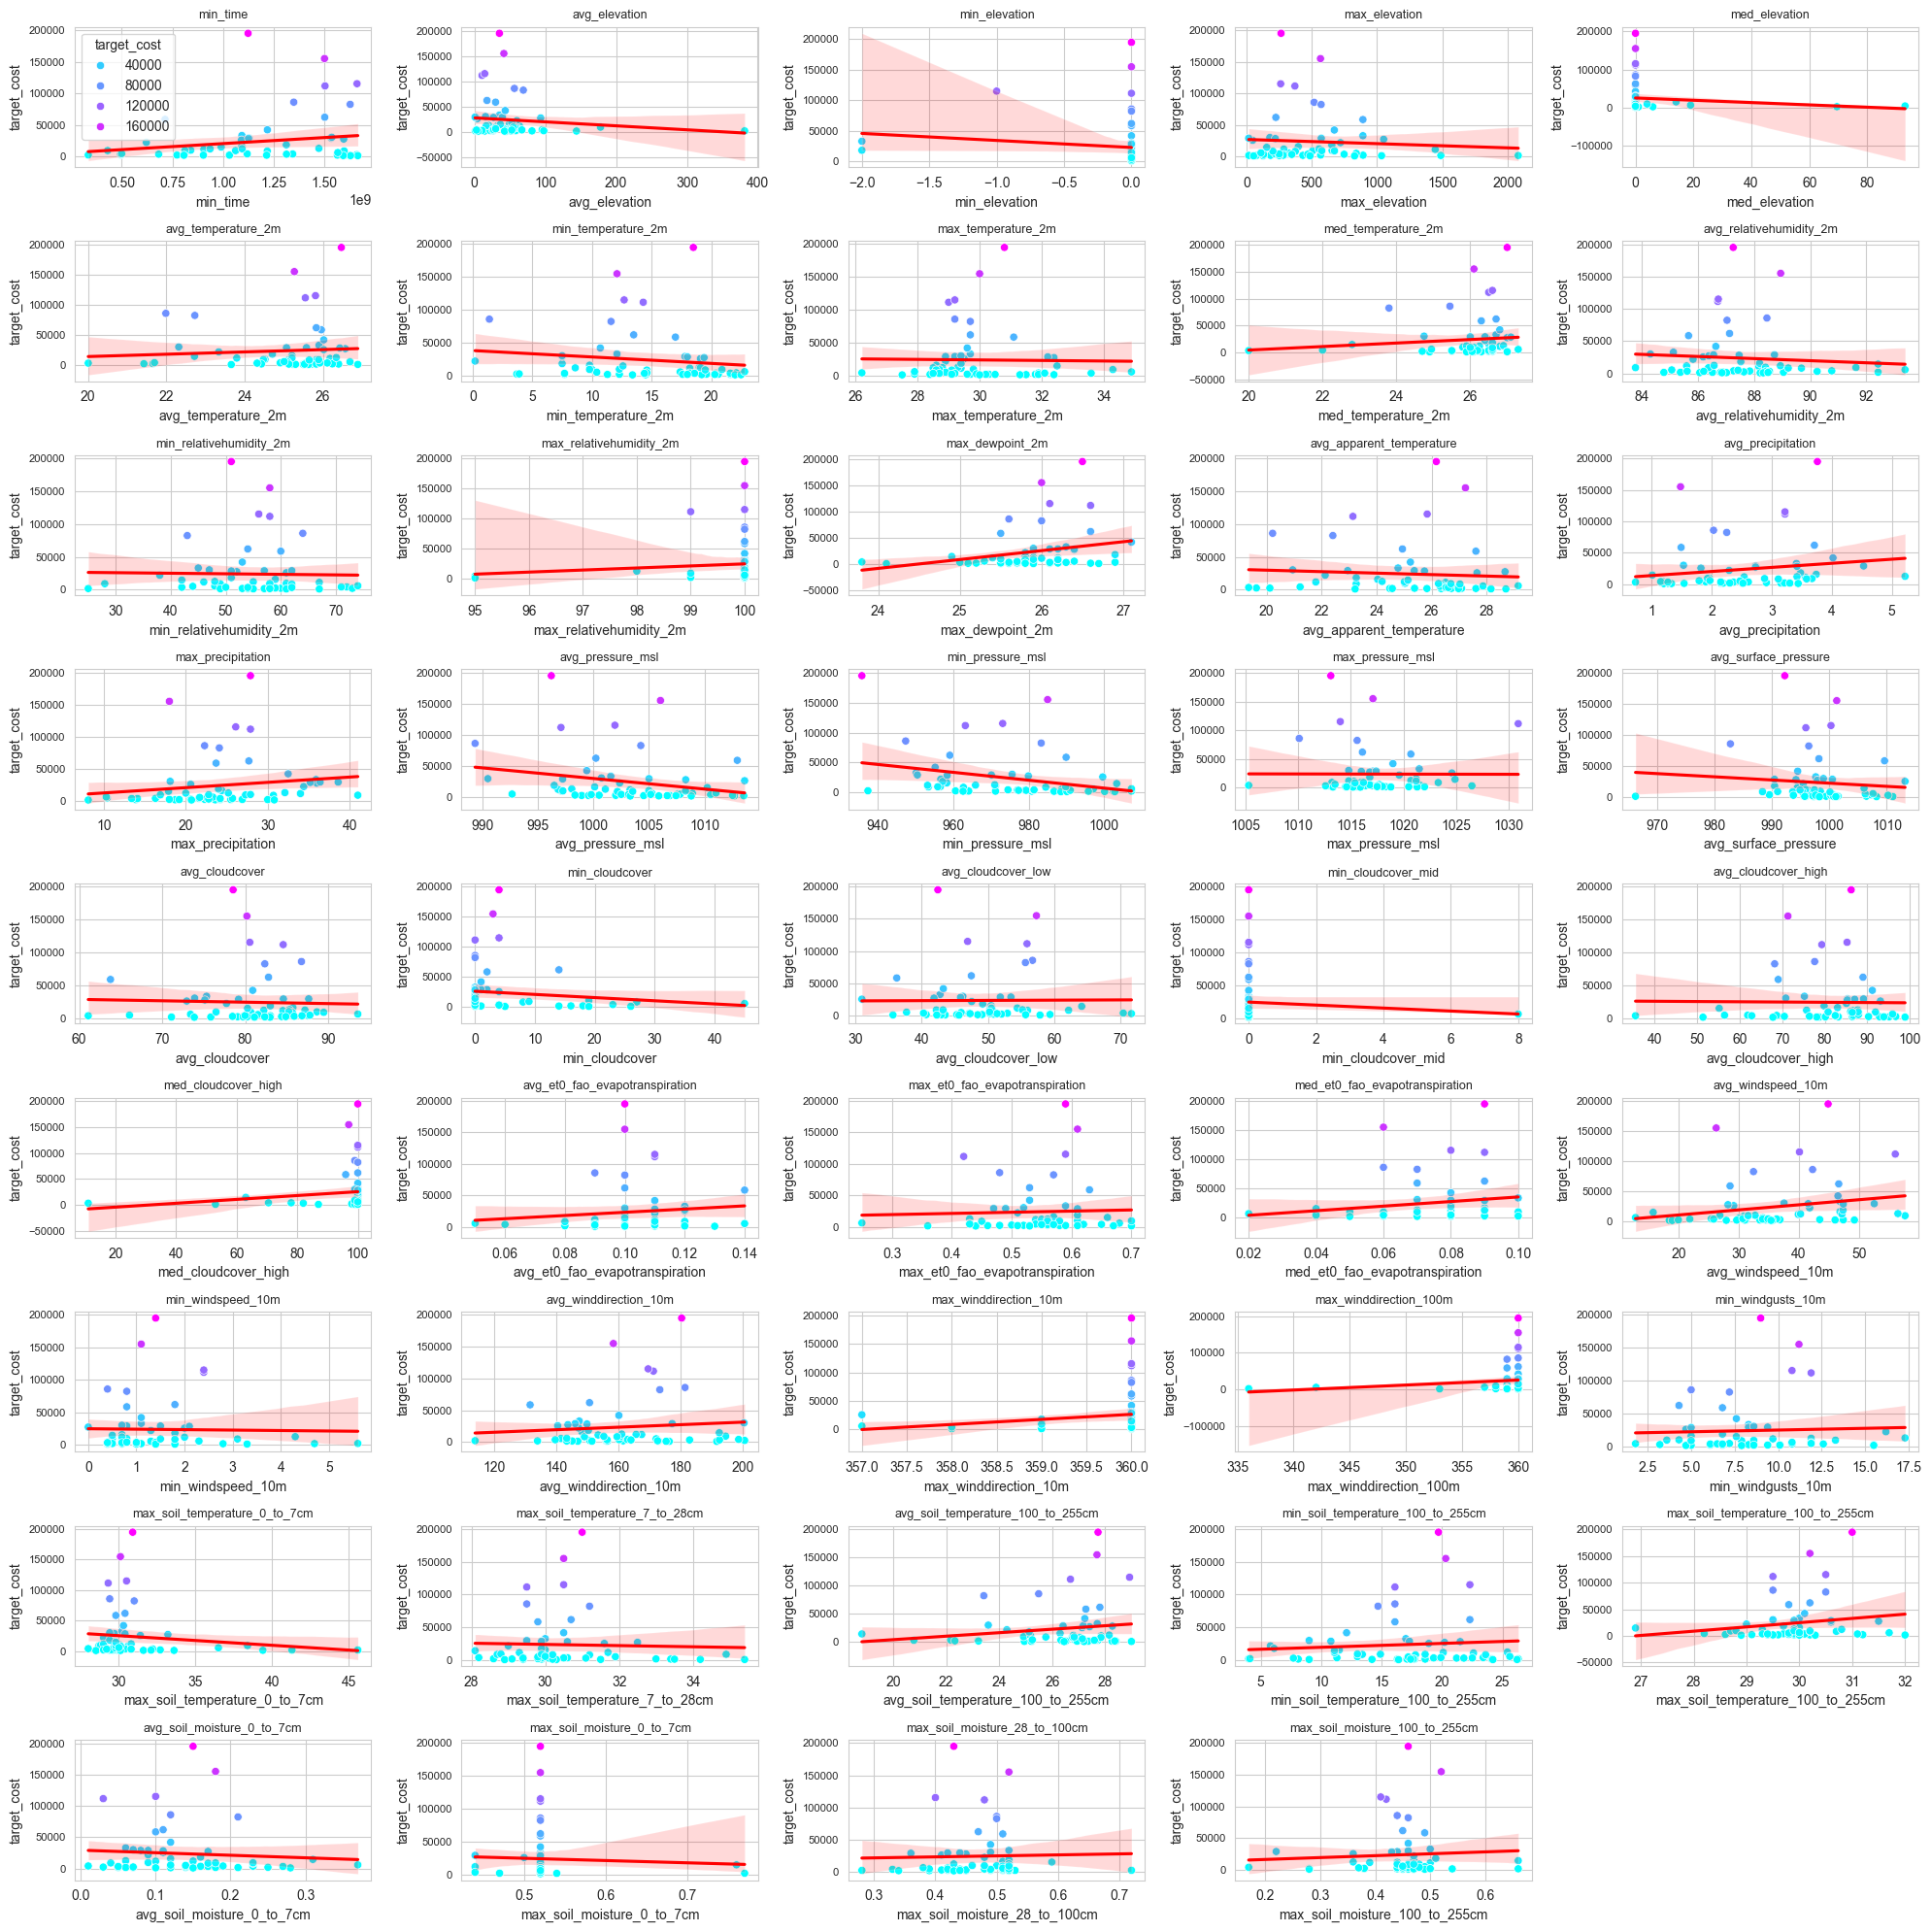

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns


features = reduced_df.columns.drop('target_cost')  # Exclude the target variable

sns.set_style('whitegrid')


cols = 5  # <<-- adjust as needed
rows = (len(features) + cols - 1) // cols  # required number of rows

# Initialize the figure with a given size
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()  

# Loop through the features and create a scatter plot with a regression line for each
for i, feature in enumerate(features):
    # Scatter plot
    sns.scatterplot(
        data=reduced_df, 
        x=feature, 
        y='target_cost', 
        hue='target_cost', 
        palette='cool', 
        legend=True if i == 0 else False, 
        ax=axes[i]
    )
    # Regression line
    sns.regplot(
        data=reduced_df, 
        x=feature, 
        y='target_cost', 
        scatter=False, 
        color='red', 
        ax=axes[i]
    )
    0
    axes[i].set_title(feature, fontsize=9)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=8)
    
    # Remove the legend if it's not the first plot
    if i != 0 and axes[i].get_legend() is not None:
        axes[i].get_legend().remove()


for j in range(i + 1, rows * cols):
    if j < len(axes):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Splitting data for training and testing

In [113]:

from sklearn import preprocessing

X_optim = reduced_df.drop(columns=['target_cost', 'min_time'], axis=1)
y_optim = reduced_df['target_cost']

X_train, X_test, y_train, y_test = train_test_split(
    X_optim, y_optim.values.reshape(-1,1), test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((45, 43), (12, 43), (45, 1), (12, 1))

## Training a linear regression model

In [114]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

for i, name in enumerate(X_train.columns):
    print(f"{name:>10}: {linear_regression}")

avg_elevation: LinearRegression()
min_elevation: LinearRegression()
max_elevation: LinearRegression()
med_elevation: LinearRegression()
avg_temperature_2m: LinearRegression()
min_temperature_2m: LinearRegression()
max_temperature_2m: LinearRegression()
med_temperature_2m: LinearRegression()
avg_relativehumidity_2m: LinearRegression()
min_relativehumidity_2m: LinearRegression()
max_relativehumidity_2m: LinearRegression()
max_dewpoint_2m: LinearRegression()
avg_apparent_temperature: LinearRegression()
avg_precipitation: LinearRegression()
max_precipitation: LinearRegression()
avg_pressure_msl: LinearRegression()
min_pressure_msl: LinearRegression()
max_pressure_msl: LinearRegression()
avg_surface_pressure: LinearRegression()
avg_cloudcover: LinearRegression()
min_cloudcover: LinearRegression()
avg_cloudcover_low: LinearRegression()
min_cloudcover_mid: LinearRegression()
avg_cloudcover_high: LinearRegression()
med_cloudcover_high: LinearRegression()
avg_et0_fao_evapotranspiration: LinearR

## Testing the model

In [116]:
predicted = linear_regression.predict(X_test)

expected = y_test

predicted, expected

(array([[ 333440.30994701],
        [ 339952.21112595],
        [ 113930.62890659],
        [ 208197.89621434],
        [ 226088.95386066],
        [-300023.4394123 ],
        [-201766.87758528],
        [ 153005.48514639],
        [ 645201.55933417],
        [ 191690.04262026],
        [ 373475.86361777],
        [ 303559.18440358]]),
 array([[ 14657.8],
        [111600. ],
        [  8395.8],
        [  3675.4],
        [ 11813.5],
        [  3366.5],
        [195046.1],
        [  9331.1],
        [  1257.8],
        [ 12600. ],
        [  8583.2],
        [  5950. ]]))

## Visualizing expected vs predicted costs

In [142]:
df = pd.DataFrame({'Predicted': predicted.reshape(1,-1).tolist()[0], 
                   'Expected': expected.reshape(1,-1).tolist()[0]})
# df['Predicted'] = pd.Series(predicted.reshape(1,-1).tolist())
# df['Expected'] = pd.Series(expected.reshape(1,-1).tolist())

In [143]:
df

,Predicted,Expected
0,333440.309947,14657.8
1,339952.211126,111600.0
2,113930.628907,8395.8
3,208197.896214,3675.4
4,226088.953861,11813.5
5,-300023.439412,3366.5
6,-201766.877585,195046.1
7,153005.485146,9331.1
8,645201.559334,1257.8
9,191690.042620,12600.0


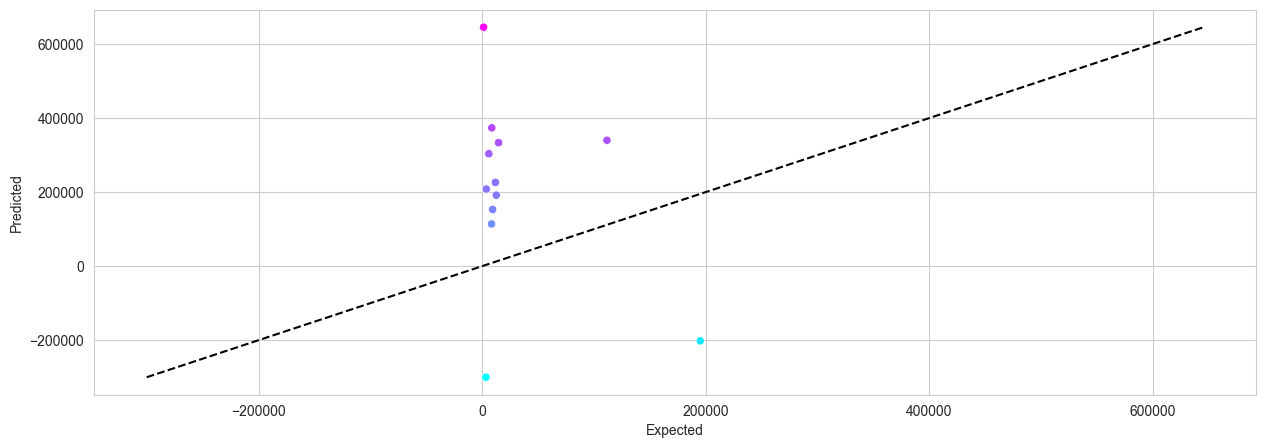

In [150]:
figure = plt.figure(figsize=(15, 5))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

line=plt.plot([start, end], [start, end], 'k--')


## Regression model metrics

In [151]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

-29.64737529827936

In [152]:
metrics.mean_squared_error(expected, predicted)

99270921440.83174

## compare different models

In [153]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

estimators = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [154]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X_train, y=y_train, cv=kfold, scoring='r2')
    print(f"{estimator_name:>16}: " +
          f"mean of r2 scores={scores.mean():.3f}")

LinearRegression: mean of r2 scores=-33883.583
      ElasticNet: mean of r2 scores=-69.796
           Lasso: mean of r2 scores=-9194.430
           Ridge: mean of r2 scores=-305.035


c:\Users\vy238\OneDrive\Desktop\pyver\venv_envs\env_tf_1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.276e+06, tolerance: 4.623e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\vy238\OneDrive\Desktop\pyver\venv_envs\env_tf_1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+07, tolerance: 4.513e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\vy238\OneDrive\Desktop\pyver\venv_envs\env_tf_1\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and feature names
# coefs = optimized_model.params.drop('const')  # Exclude the intercept
coefs = optimized_model.params
coefs_sorted = coefs.sort_values(ascending=False)  # Sort coefficients from high to low
features_sorted = coefs_sorted.index

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=features_sorted, x=coefs_sorted.values, orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance from Linear Regression Coefficients (Sorted)')
plt.show()

